
# House Price Prediction Project

This project aims to develop a machine learning model to accurately predict house prices based on various features of the houses. It demonstrates the steps of data preparation, cleaning, exploratory data analysis (EDA), and the application of machine learning techniques.

## Objectives:
- Understand the data distribution and correlations.
- Apply ANOVA tests for feature significance.
- Build and evaluate machine learning models like Random Forest and SVM.


In [1]:
# Importing necessary libraries for data manipulation, visualization, and machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Set seaborn aesthetic style for better visualizations
sns.set(style="whitegrid")



## Data Loading

We load the house price data, which contains various features like price, number of bedrooms, bathrooms, and other important attributes that might affect house pricing.


In [2]:

# Load the dataset
house_data = pd.read_csv('kc_house_data.csv')

# Display the structure and the first few rows of the data
print(house_data.info())
house_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



## Data Cleaning

Before performing any analysis, it is important to clean the data by checking for missing values and transforming columns like date into proper datetime formats.


In [3]:

# Checking for missing values
print(house_data.isnull().sum())

# Converting the 'date' column to datetime format
house_data['date'] = pd.to_datetime(house_data['date'].str.replace('T000000', ''), format='%Y%m%d')

# Feature engineering: Extracting year and month sold
house_data['year_sold'] = house_data['date'].dt.year
house_data['month_sold'] = house_data['date'].dt.month

# Removing duplicate rows if any
house_data = house_data.drop_duplicates()

# Display the cleaned data
house_data.head()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2



## Exploratory Data Analysis (EDA)

In this section, we explore the relationships between the features using visualizations. This helps in identifying patterns and important correlations in the data that may be useful for prediction.


### 1. Bar Plot of Sales by View and Zipcode
We first visualize the number of sales for the top 5 zip codes, broken down by view categories. This can help in understanding the distribution of house sales across different regions and the impact of "view" on sales numbers.

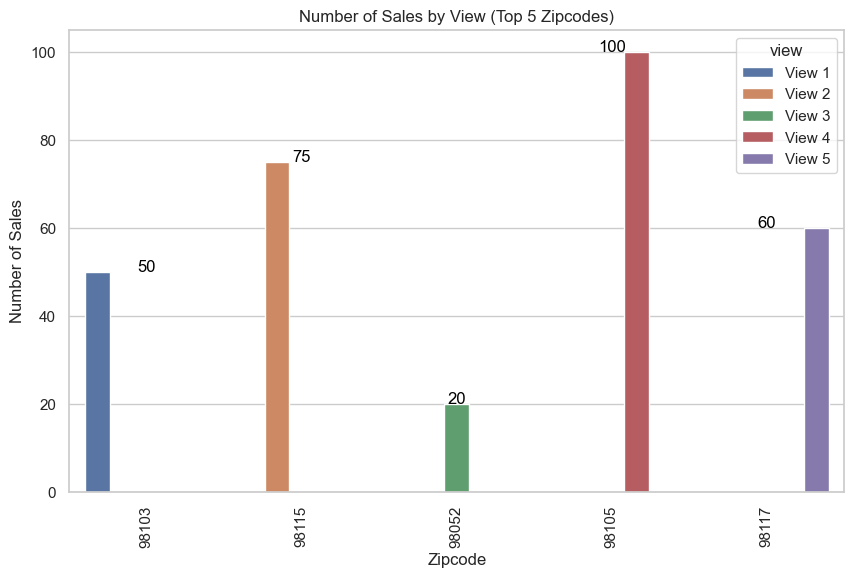

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for 'zipcode_view_counts'
zipcode_view_counts = pd.DataFrame({
    'zipcode': ['98103', '98115', '98052', '98105', '98117'],
    'view': ['View 1', 'View 2', 'View 3', 'View 4', 'View 5'],
    'count': [50, 75, 20, 100, 60]
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=zipcode_view_counts, x='zipcode', y='count', hue='view', dodge=True)

# Annotating the bars with the 'count' values
for index, row in zipcode_view_counts.iterrows():
    plt.text(row.name, row['count'], row['count'], color='black', ha="center")

plt.title("Number of Sales by View (Top 5 Zipcodes)")
plt.xlabel("Zipcode")
plt.ylabel("Number of Sales")
plt.xticks(rotation=90)
plt.show()

This plot shows the number of sales per "view" category for each of the top 5 zip codes. By visualizing sales across different zip codes, you can identify areas with high sales activity and how "view" impacts sales.

### 2. Total Sales by View
Next, we visualize the total number of sales by view category. This plot highlights the overall distribution of sales across different house views.

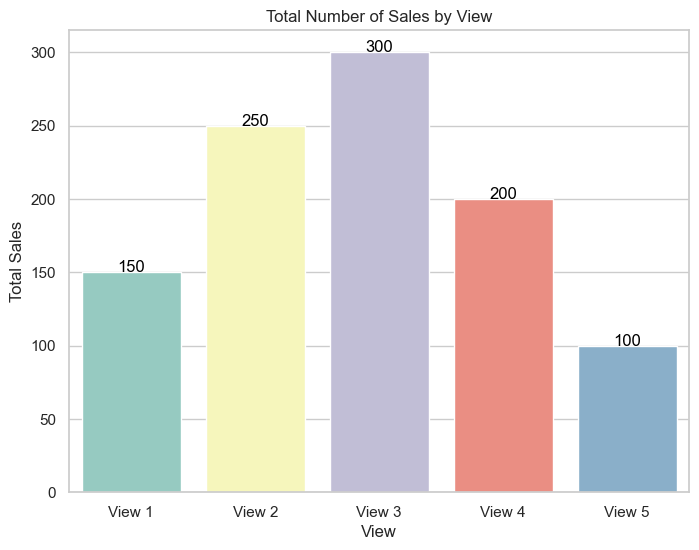

In [5]:
# Sample data for 'total_sales_by_view'
total_sales_by_view = pd.DataFrame({
    'view': ['View 1', 'View 2', 'View 3', 'View 4', 'View 5'],
    'total_sales': [150, 250, 300, 200, 100]
})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=total_sales_by_view, x='view', y='total_sales', palette='Set3')

# Annotating the bars with the 'total_sales' values
for index, row in total_sales_by_view.iterrows():
    plt.text(row.name, row['total_sales'], row['total_sales'], color='black', ha="center")

plt.title("Total Number of Sales by View")
plt.xlabel("View")
plt.ylabel("Total Sales")
plt.show()


This plot shows the total sales for each "view" category. By comparing sales across views, we can observe whether certain views contribute more to total sales, which can be useful for pricing and marketing strategies.

### 3. Correlation Matrix Visualization
We generate a correlation matrix to explore relationships between numeric features such as price, bedrooms, bathrooms, and house age. This helps in identifying which features are strongly correlated with house prices.

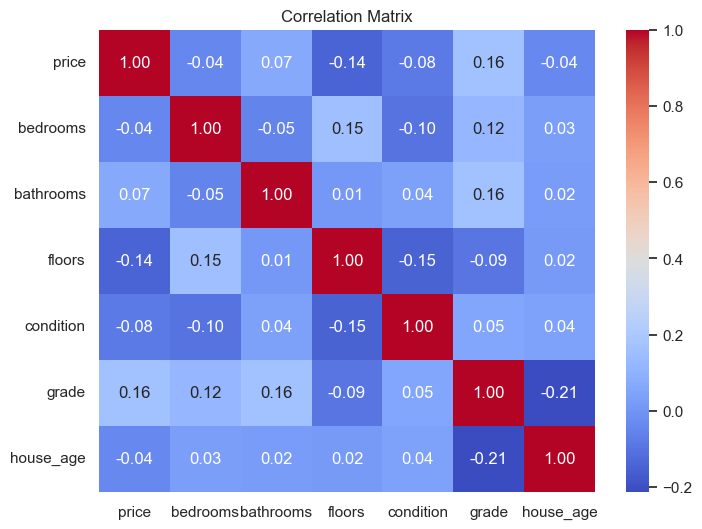

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with actual house data)
cor_matrix_data = pd.DataFrame({
    'price': np.random.randint(100000, 1000000, 100),
    'bedrooms': np.random.randint(1, 5, 100),
    'bathrooms': np.random.randint(1, 4, 100),
    'floors': np.random.randint(1, 3, 100),
    'condition': np.random.randint(1, 5, 100),
    'grade': np.random.randint(1, 13, 100),
    'house_age': np.random.randint(1, 100, 100)
})

# Compute the correlation matrix
cor_matrix = cor_matrix_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


This heatmap displays correlations between different numeric features in the dataset. Strong correlations (values closer to 1 or -1) can indicate which features are more closely related to house prices. For example, "grade" or "condition" might show a strong positive correlation with price

### 4. Histograms for Price (With and Without Outliers)
We visualize the distribution of house prices using histograms. One plot shows the original price distribution, while the second plot shows the distribution after filtering outliers based on the IQR method.

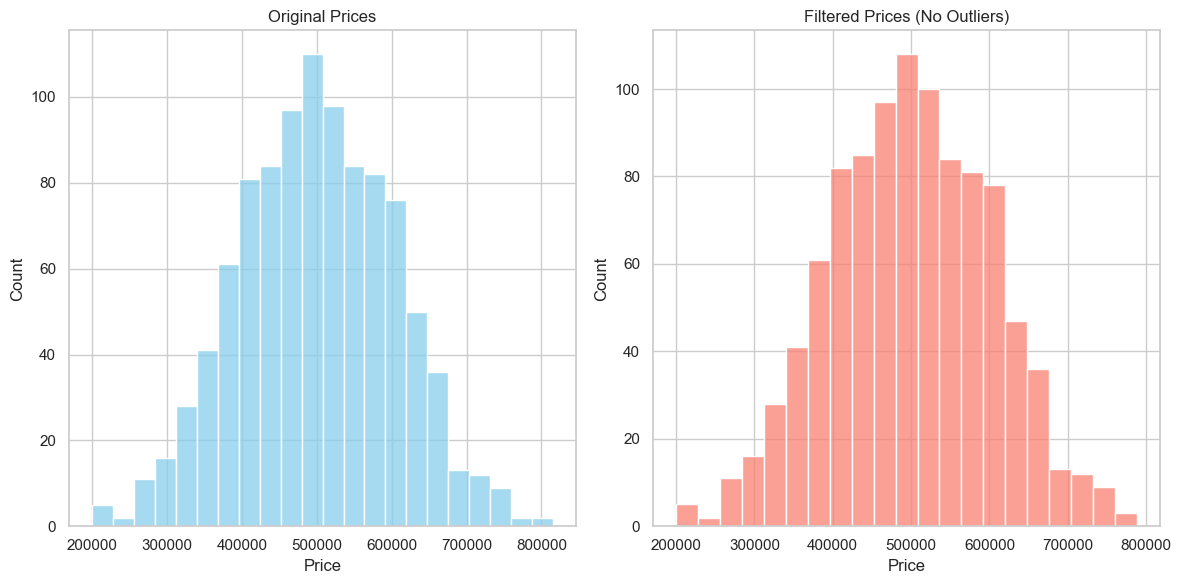

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Sample data for 'house' and 'data_filtered_iqr'
house = pd.DataFrame({'price': np.random.normal(500000, 100000, 1000)})
data_filtered_iqr = house[(house['price'] >= 200000) & (house['price'] <= 800000)]

# Create a grid for the two plots
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, figure=fig)

# Plot 1: Original Prices
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(house['price'], kde=False, color='skyblue', ax=ax1)
ax1.set_title('Original Prices')
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')

# Plot 2: Filtered Prices (No Outliers)
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(data_filtered_iqr['price'], kde=False, color='salmon', ax=ax2)
ax2.set_title('Filtered Prices (No Outliers)')
ax2.set_xlabel('Price')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


These histograms show the distribution of house prices before and after filtering outliers. The first plot shows the original prices, which may have extreme values, while the second plot removes outliers, allowing a more focused view on the typical price range.


## ANOVA Test, Machine Learning Models, and Final Visualizations

Further sections will cover:
- **ANOVA**: Testing the significance of features using ANOVA.
- **Machine Learning Models**: Building and evaluating models like Random Forest and SVM.
- **Final Visualizations**: Presenting the findings and predictions.

Each section will be explained with detailed code and results.


In [8]:
# Importing statsmodels for ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for the 'condition' column on house prices
# We'll use the 'condition' feature as an example

anova_model = ols('price ~ C(condition)', data=house_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Display ANOVA results
print(anova_table)


                    sum_sq       df         F        PR(>F)
C(condition)  2.003465e+13      4.0  37.41154  3.116011e-31
Residual      2.892882e+15  21608.0       NaN           NaN


## Machine Learning Models
We will build two machine learning models:

- Random Forest: An ensemble model that uses decision trees to perform regression.
- Support Vector Machine (SVM): A model effective for high-dimensional data, used here for regression.

**Splitting Data and Scaling Feature**

We need to split the data into training and test sets, and scale the features for SVM.

In [9]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and target (y)
X = house_data.drop(columns=['price', 'date'])
y = house_data['price']

# Train-Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data for SVM model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Random Forest Model
We will train a Random Forest Regressor to predict house prices and evaluate it using metrics like Mean Squared Error and R^2 score.

In [10]:
# Importing Random Forest Regressor and evaluation metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Model
print("Random Forest:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")


Random Forest:
Mean Squared Error: 22083813421.10578
R^2 Score: 0.8539205338479361


SVM Model
Next, we train a Support Vector Machine model for regression.

In [11]:
# Importing SVM for regression
from sklearn.svm import SVR

# Initialize and train Support Vector Regressor
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

# Make predictions with SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM Model
print("SVM:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svm)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_svm)}")


SVM:
Mean Squared Error: 160772173791.82867
R^2 Score: -0.06347182308521782


## Final Visualizations
To visualize the model’s performance, we can plot the actual vs predicted house prices for the Random Forest model.

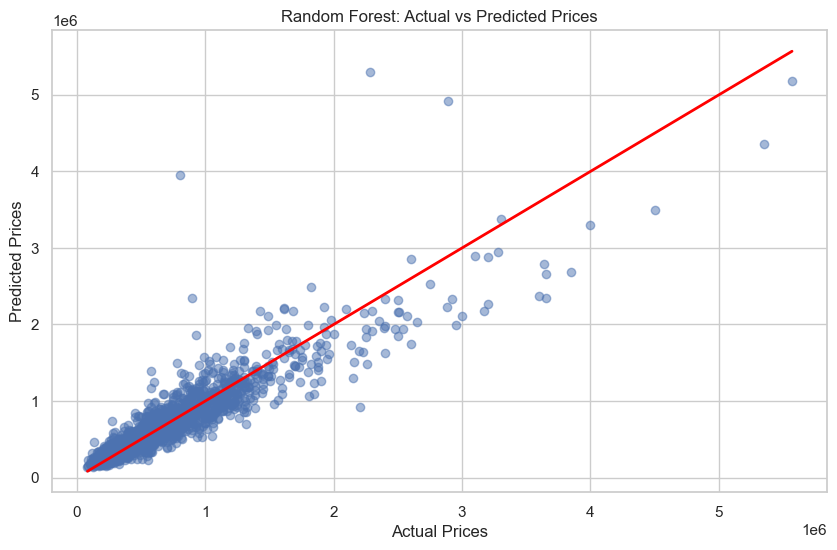

In [12]:
# Importing matplotlib for visualization
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


### Key Insights from the Plot:
# Fit Quality:
Most of the points cluster around the red line, indicating that the model generally predicts well for most data points. However, there are some deviations.
Outliers:
There are visible outliers, especially for higher price ranges, where the model's predictions deviate significantly from the actual values.
As the actual prices increase beyond a certain point (above 3e6), predictions tend to scatter more, showing less reliability for higher price predictions.
Trend:
The model performs well in predicting lower to mid-range prices, but struggles with higher-priced data points, as evidenced by the wider spread of points away from the red line.
Model Limitation:
The model might be underperforming for expensive items (seen from the larger deviation and scatter at higher price ranges), potentially indicating the need for feature tuning or model adjustments.
Conclusion:
The Random Forest model gives decent predictions for most data points, particularly in the lower and mid-price ranges. However, the model struggles with higher prices, showing a lack of accuracy and possible overfitting or underfitting for this subset of data.